# Watershed Algorithm

In [1]:
import numpy as np
import cv2
import warnings
import matplotlib.pyplot as plt

%matplotlib inline
warnings.filterwarnings("ignore")

In [5]:
def display(img, cmap='gray'):
    fig = plt.figure(figsize = (10,8))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap = 'gray')

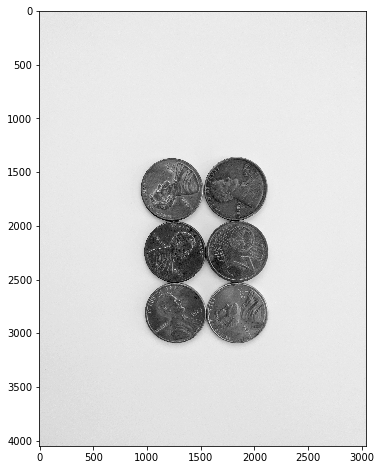

In [8]:
sep_coins = cv2.imread("Computer-Vision-with-Python/DATA/pennies.jpg")
gray_coins = cv2.cvtColor(sep_coins, cv2.COLOR_BGR2GRAY)
display(gray_coins)

## Apply median blur

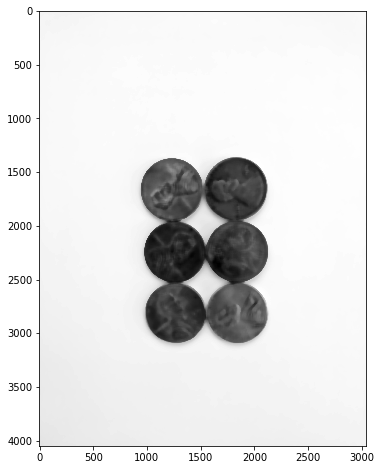

In [7]:
# Median blur
sep_blur = cv2.medianBlur(gray_coins, 35)
display(sep_blur)

## Apply Threshold

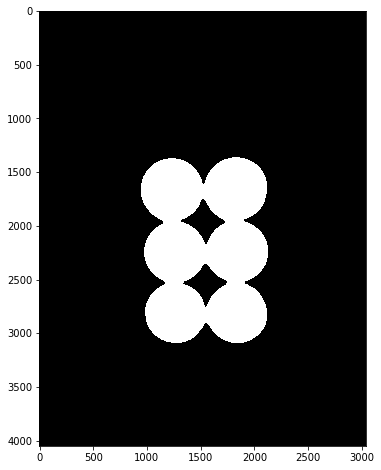

In [9]:
ret, sep_thresh = cv2.threshold(sep_blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
display(sep_thresh)

## Find Contours

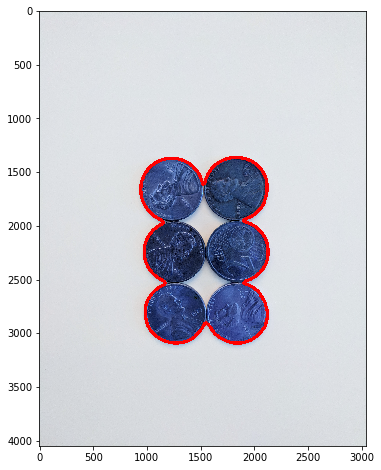

In [10]:
# find contours
image, contours, hierarchy = cv2.findContours(sep_thresh.copy(), cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

for i in range(len(contours)):
    if hierarchy[0][i][3] == -1:
        cv2.drawContours(sep_coins, contours, i, (255,0,0),30)
        
display(sep_coins) # Not good result!!!

### Noisy Reduction (optional)

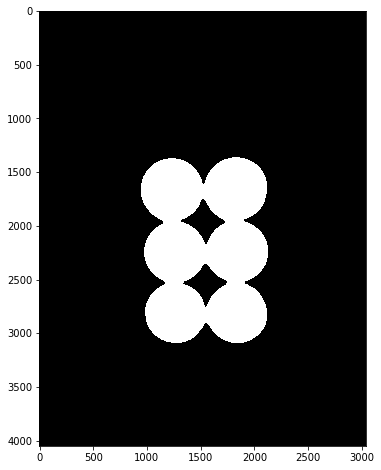

In [11]:
# Noisy Reduction (optional)
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(sep_thresh, cv2.MORPH_OPEN, kernel, iterations = 2)
display(opening)

## Distance Transformation

All blobs are still touching each other which is a biggest challenge. So we need to put seeds on each circle

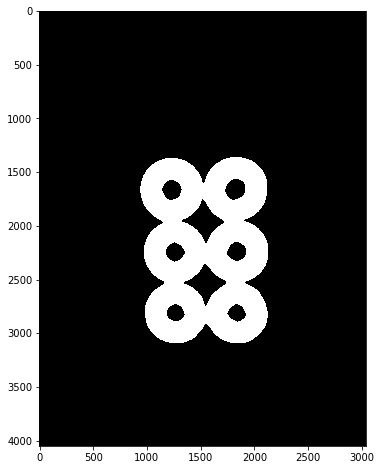

In [12]:
#### Distance Transformation
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)

# and then dilate
sure_bg = cv2.dilate(opening, kernel, iterations = 3)

# for sure through this threshold we get six points as a foreground they will be seeds
ret, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255,0)

sure_fg = np.uint8(sure_fg)

unknown = cv2.subtract(sure_bg, sure_fg)
display(unknown)

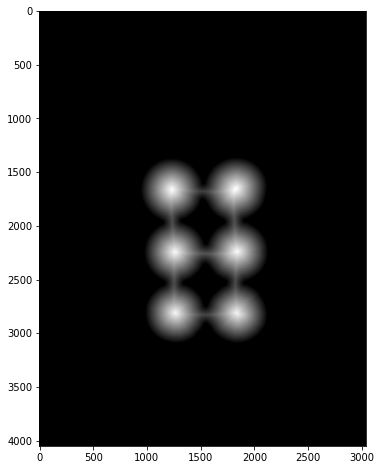

In [13]:
# Optional
display(dist_transform)

## Make marker

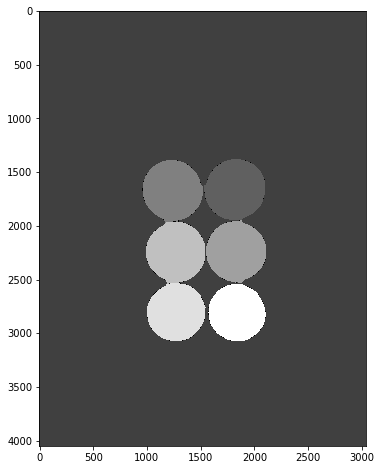

In [14]:
# make marker
ret, markers = cv2.connectedComponents(sure_fg)

markers = markers + 1
markers[unknown==255] = 0

markers = cv2.watershed(sep_coins, markers)

display(markers) # now we have 6 distinct markers

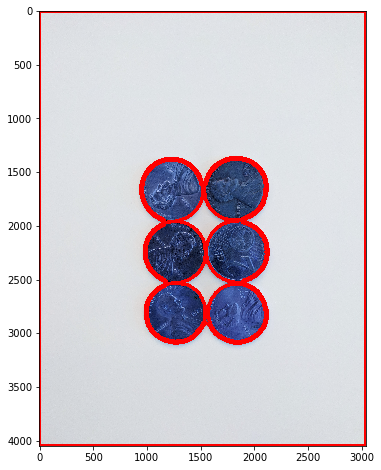

In [15]:
image, contours, hierarchy = cv2.findContours(markers, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

for i in range(len(contours)):
    if hierarchy[0][i][3] == -1:
        cv2.drawContours(sep_coins, contours, i, (255,0,0),30)
        
display(sep_coins)